In [364]:
import numpy as np
import matplotlib.pyplot as plt


In [365]:
def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points


In [366]:
Points = create_dataset_00()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


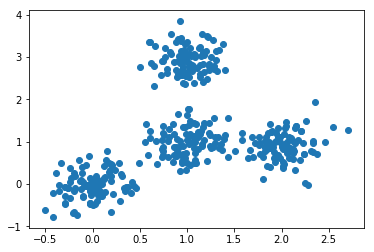

In [367]:
plt.scatter(Points[:,0], Points[:,1])
plt.show()

In [368]:
from random import random
def create_dataset_01():
    def line0(x):
        return (x, 10 - x**2 + (random() - 0.5))
    Points = []
    for _ in range(1000):
        x = 5*(random() - 0.5)
        point = line0(x)
        Points.append(point)
        
    def line1(x):
        return (x, 5*random() +((x)*(x-8)) + 5 )
    
    for _ in range(1000):
        x = 5*(random()+.1)
        point = line1(x)
        Points.append(point)
    
    Points = np.array(Points)
    return np.vstack(
        [
            Points, 
            np.random.multivariate_normal((5,5), [[1,0],[0,1]],100)
        ])

In [369]:
X = create_dataset_01()

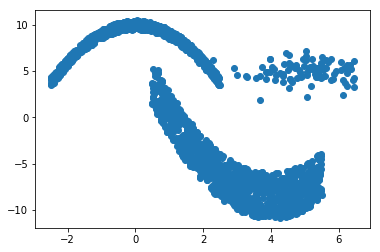

In [370]:
plt.scatter(X[:,0], X[:,1])
plt.show()

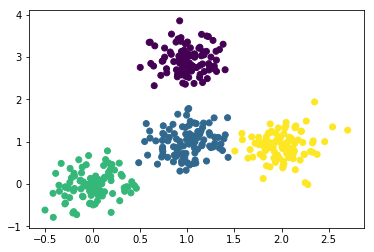

In [407]:
from sklearn.cluster import KMeans, DBSCAN

kmeans_model = KMeans(n_clusters=4)
y_pred = kmeans_model.fit_predict(Points)

plt.scatter(Points[:, 0], Points[:, 1], c=y_pred)
plt.show()


In [372]:
db = DBSCAN(eps=0.29, min_samples=20).fit(Points)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 24


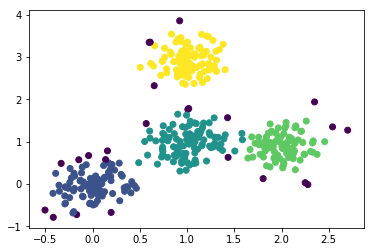

In [373]:
plt.scatter(Points[:, 0], Points[:, 1], c=db.labels_)
plt.show()

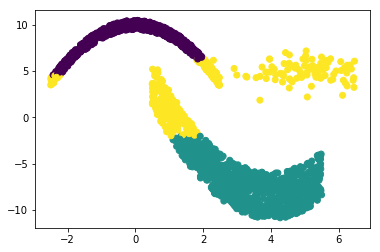

In [374]:
kmeans_model = KMeans(n_clusters=3, max_iter=100, n_init=1, \
                    init='k-means++',n_jobs=1)
y_pred = kmeans_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [556]:
db = DBSCAN(eps=0.5, min_samples=7).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 21


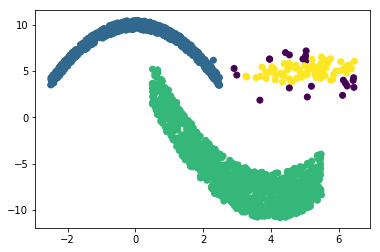

In [557]:
plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.show()

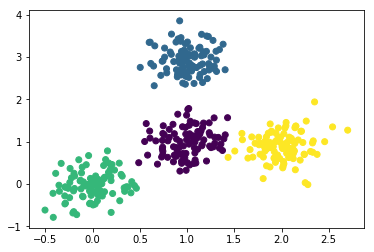

In [377]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4)
label = clustering.fit(Points)
plt.scatter(Points[:, 0], Points[:, 1], c=clustering.labels_)
plt.show()


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x112371e18>)


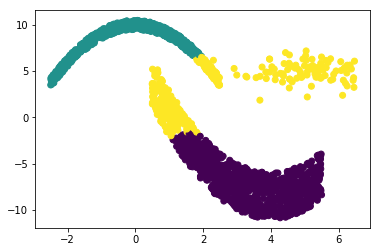

In [378]:
clustering = AgglomerativeClustering(n_clusters=3)
print(clustering)
label = clustering.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()

In [549]:
from __future__ import absolute_import, division, print_function, unicode_literals


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras

In [550]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(64, activation='relu'))
# Add another:
model.add(layers.Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(layers.Dense(4, activation='softmax'))

In [551]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [552]:
test_data = []
test_label = []
train_data = Points
train_label = y_pred
for i in range(8):
    index = random.randint(0,399)
    test_data.append(Points[index])
    test_label.append(y_pred[index])
    train_data = np.delete(train_data, index, 0)
    train_label = np.delete(train_label, index, 0)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [553]:
#model.fit(train_data,train_label,epochs=10)

In [554]:
#loss, acc = model.evaluate(test_data, test_label)

In [555]:
model.fit(train_data, train_label, epochs=10, batch_size=32,
          validation_data=(test_data, test_label))

Train on 392 samples, validate on 8 samples
Epoch 1/10
392/392 [==============================] - 0s 711us/sample - loss: 1.3219 - acc: 0.4388 - val_loss: 1.1738 - val_acc: 0.8750
Epoch 2/10
392/392 [==============================] - 0s 51us/sample - loss: 1.1719 - acc: 0.6786 - val_loss: 1.0019 - val_acc: 0.8750
Epoch 3/10
392/392 [==============================] - 0s 51us/sample - loss: 1.0236 - acc: 0.7041 - val_loss: 0.8317 - val_acc: 0.8750
Epoch 4/10
392/392 [==============================] - 0s 53us/sample - loss: 0.8688 - acc: 0.7372 - val_loss: 0.6675 - val_acc: 0.8750
Epoch 5/10
392/392 [==============================] - 0s 48us/sample - loss: 0.7148 - acc: 0.7883 - val_loss: 0.5013 - val_acc: 1.0000
Epoch 6/10
392/392 [==============================] - 0s 46us/sample - loss: 0.5733 - acc: 0.8444 - val_loss: 0.3838 - val_acc: 1.0000
Epoch 7/10
392/392 [==============================] - 0s 47us/sample - loss: 0.4652 - acc: 0.9209 - val_loss: 0.3114 - val_acc: 1.0000
Epoch 8/10